In [430]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
import final_project_functions as fun
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [463]:
games = pd.read_csv("Data/games.csv")
players = pd.read_csv("Data/players.csv")
plays = pd.read_csv("Data/plays.csv")
week1 = pd.read_csv("Data/week1.csv")

OFFENSE = ['QB', 'RB', 'WR', 'TE', 'FB']

- Measuring which players are the most effective at intercepting and sacking throughout the nfl, along with looking at stats such as the number of penalties and passes completed while they were on the field or against them to measure if they were responsible for the play

In [346]:
week1.event.unique()

array(['None', 'ball_snap', 'pass_forward', 'pass_arrived',
       'pass_outcome_caught', 'out_of_bounds', 'pass_outcome_incomplete',
       'first_contact', 'tackle', 'man_in_motion', 'play_action',
       'qb_sack', 'fumble', 'fumble_offense_recovered', 'handoff',
       'pass_tipped', 'pass_outcome_interception', 'qb_strip_sack',
       'pass_shovel', 'line_set', 'shift', 'touchdown',
       'fumble_defense_recovered', 'pass_outcome_touchdown', 'run',
       'touchback', 'penalty_flag', 'penalty_accepted', 'qb_spike',
       'field_goal_blocked'], dtype=object)

In [347]:
week_columns =['pass_forward', 'pass_arrived',
       'pass_outcome_caught',  'pass_outcome_incomplete',
       'tackle', 'play_action',
       'qb_sack', 'fumble', 'fumble_offense_recovered',
       'pass_tipped', 'pass_outcome_interception', 'qb_strip_sack',
       'touchdown',
       'fumble_defense_recovered', 'pass_outcome_touchdown',
        'penalty_flag', 'penalty_accepted']

In [474]:
df_int_1 = fun.organize_by("INTERCEPTED by ", 'pass_outcome_interception',plays, games, week1, players,1)
df_int_1.shape

(30, 16)

In [476]:
df_int_1.head()

,playDescription,possessionTeam,gameId,playId,homeTeamAbbr,visitorTeamAbbr,week,nflId,displayName,event,x,y,frameId,position,shorten_name,team
767,R.Douglas,ATL,2018090600,3392,PHI,ATL,1,2558168.0,Rasul Douglas,pass_outcome_interception,14.01,0.55,55,CB,R.Douglas,PHI
1632,D.Jones,PHI,2018090600,3481,PHI,ATL,1,2555162.0,Deion Jones,pass_outcome_interception,56.60,32.07,58,MLB,D.Jones,ATL
3235,D.Ward,PIT,2018090901,704,CLE,PIT,1,2560916.0,Denzel Ward,pass_outcome_interception,96.88,9.97,60,CB,D.Ward,CLE
4997,D.Randall,PIT,2018090901,1516,CLE,PIT,1,2552389.0,Damarious Randall,pass_outcome_interception,49.76,24.45,78,CB,D.Randall,CLE
6204,D.Ward,PIT,2018090901,1912,CLE,PIT,1,2560916.0,Denzel Ward,pass_outcome_interception,37.27,41.40,40,CB,D.Ward,CLE


You might also want to keep the offensive players so we can see what defender was guarding the offensive player when they caught it.

In [488]:
df_deflections_1 = fun.defense_on_catches(None, 'pass_outcome_incomplete',plays, games, week1, players,1)

In [489]:
testing.head(2)

,playDescription,possessionTeam,gameId,playId,homeTeamAbbr,visitorTeamAbbr,week,nflId,displayName,event,x,y,frameId,position,team,shorten_name,defenders
1488,(13:10) M.Ryan pass incomplete short right to ...,ATL,2018090600,146,PHI,ATL,1,2552315.0,Jordan Hicks,pass_outcome_incomplete,46.86,37.71,48,MLB,PHI,J.Hicks,True
1491,(13:10) M.Ryan pass incomplete short right to ...,ATL,2018090600,146,PHI,ATL,1,2555383.0,Jalen Mills,pass_outcome_incomplete,46.98,38.04,48,CB,PHI,J.Mills,True


In [432]:
keyword = None
event_word = 'pass_outcome_incomplete'
week_number = 1
week = week1.copy()

In [433]:
if keyword==None:
    df_plays = plays[['playDescription','possessionTeam', 'gameId','playId']]
else:
    df_plays = plays[plays.playDescription.str.contains(keyword)][['playDescription','possessionTeam', 'gameId','playId']]

In [434]:
df_merge_games = pd.merge(df_plays, games[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr','week']], how='inner', on='gameId')
week['week'] = week_number

In [435]:
df_merge_week = pd.merge(df_merge_games, week[['gameId', 'playId','nflId', 'displayName', 'event', 'x','y', 'frameId', 'week', 'position']], on=['gameId', 'playId', 'week'])
# getting only defensive players
df_defense = df_merge_week[~df_merge_week.position.isin(['QB'])]

df_defense = df_defense[df_defense.event == event_word]

In [436]:
df_defense['shorten_name'] = df_defense.displayName.apply(lambda row: shorten(row))

In [398]:
# df_defense

In [387]:
def get_defender(row):
    words = row[row.index('incomplete'):]
    output = []
    if "(" in words:
        words = words[words.index("(")+1:words.index(")")]
        
        if ',' in words:
            return words.split(', ')
        else:
            return [words]

In [443]:
df_defense['defended'] = df_defense[['playDescription', 'shorten_name']].apply(lambda row: fun.get_defender(row), axis=1)


In [446]:
df_defense.dropna()

,playDescription,possessionTeam,gameId,playId,homeTeamAbbr,visitorTeamAbbr,week,nflId,displayName,event,x,y,frameId,position,shorten_name,defended
1488,(13:10) M.Ryan pass incomplete short right to ...,ATL,2018090600,146,PHI,ATL,1,2552315.0,Jordan Hicks,pass_outcome_incomplete,46.86,37.71,48,MLB,J.Hicks,True
1491,(13:10) M.Ryan pass incomplete short right to ...,ATL,2018090600,146,PHI,ATL,1,2555383.0,Jalen Mills,pass_outcome_incomplete,46.98,38.04,48,CB,J.Mills,True
5186,(9:24) (Shotgun) N.Foles pass incomplete short...,PHI,2018090600,344,PHI,ATL,1,2543850.0,Ricardo Allen,pass_outcome_incomplete,22.79,45.92,44,SS,R.Allen,True
13513,(:30) M.Ryan pass incomplete short middle to J...,ATL,2018090600,889,PHI,ATL,1,2552689.0,Ronald Darby,pass_outcome_incomplete,76.95,25.76,54,CB,R.Darby,True
20028,(7:43) (Shotgun) N.Foles pass incomplete deep ...,PHI,2018090600,1295,PHI,ATL,1,2557967.0,Duke Riley,pass_outcome_incomplete,5.09,52.83,60,OLB,D.Riley,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924307,(12:27) J.Goff pass incomplete short left to B...,LA,2018091001,1151,OAK,LA,1,2495153.0,Marcus Gilchrist,pass_outcome_incomplete,33.29,37.20,43,FS,M.Gilchrist,True
931733,(2:53) (Shotgun) J.Goff pass incomplete short ...,LA,2018091001,1673,OAK,LA,1,306.0,Dominique Rodgers-Cromartie,pass_outcome_incomplete,105.39,44.28,58,CB,D.Rodgers-Cromartie,True
943796,(9:11) (Shotgun) J.Goff pass incomplete short ...,LA,2018091001,2416,OAK,LA,1,2495617.0,Leon Hall,pass_outcome_incomplete,8.48,17.82,45,CB,L.Hall,True
963486,(9:29) (Shotgun) J.Goff pass incomplete short ...,LA,2018091001,3385,OAK,LA,1,2532986.0,Tahir Whitehead,pass_outcome_incomplete,67.07,25.44,48,OLB,T.Whitehead,True


In [403]:
df_defense.head(2)

,playDescription,possessionTeam,gameId,playId,homeTeamAbbr,visitorTeamAbbr,week,nflId,displayName,event,x,y,frameId,position,shorten_name,defenders
1485,(13:10) M.Ryan pass incomplete short right to ...,ATL,2018090600,146,PHI,ATL,1,79848.0,Malcolm Jenkins,pass_outcome_incomplete,42.12,48.93,48,SS,M.Jenkins,"[J.Mills, J.Hicks]"
1486,(13:10) M.Ryan pass incomplete short right to ...,ATL,2018090600,146,PHI,ATL,1,2534832.0,Rodney McLeod,pass_outcome_incomplete,39.42,35.51,48,FS,R.McLeod,"[J.Mills, J.Hicks]"


In [420]:
df_test = df_defense[(df_defense.playId == 146) & (df_defense.gameId ==2018090600)]

In [425]:
# df_defense.defenders.tolist()

In [423]:
df_test.shorten_name.isin(['J.Hicks', 'J.Mills'])

1485    False
1486    False
1487    False
1488     True
1489    False
1490    False
1491     True
1492    False
1493    False
1494    False
1495    False
1496    False
1497    False
Name: shorten_name, dtype: bool

In [421]:
df_defense[df_defense.shorten_name.isin(df_defense.defenders.tolist())]

,playDescription,possessionTeam,gameId,playId,homeTeamAbbr,visitorTeamAbbr,week,nflId,displayName,event,x,y,frameId,position,shorten_name,defenders


In [426]:
df_defense[df_defense.shorten_name.isin(df_defense.defenders.tolist())]

,playDescription,possessionTeam,gameId,playId,homeTeamAbbr,visitorTeamAbbr,week,nflId,displayName,event,x,y,frameId,position,shorten_name,defenders


In [ ]:
if keyword:
    df_defense['playDescription'] = df_defense['playDescription'].apply(lambda row: clean_description(row, keyword))

df_defense['team'] = df_defense[['possessionTeam', 'homeTeamAbbr', 'visitorTeamAbbr']].apply(lambda row: get_team(row), axis=1)
if keyword == None:
    return df_defense
else:
    return df_defense[df_defense.playDescription == df_defense.shorten_name]

In [345]:
# df_week1_int

In [330]:
df_week1_int.columns

Index(['playDescription', 'possessionTeam', 'gameId', 'playId', 'homeTeamAbbr',
       'visitorTeamAbbr', 'week', 'nflId', 'displayName', 'event', 'x', 'y',
       'frameId', 'position', 'shorten_name'],
      dtype='object')

In [331]:
columns_int = ['nflId', 'displayName', 'event', 'gameId','playId', 
              'homeTeamAbbr','visitorTeamAbbr', 'position', 'frameId']

In [332]:
df_week1_int[columns_int]

,nflId,displayName,event,gameId,playId,homeTeamAbbr,visitorTeamAbbr,position,frameId
767,2558168.0,Rasul Douglas,pass_outcome_interception,2018090600,3392,PHI,ATL,CB,55
1632,2555162.0,Deion Jones,pass_outcome_interception,2018090600,3481,PHI,ATL,MLB,58
3235,2560916.0,Denzel Ward,pass_outcome_interception,2018090901,704,CLE,PIT,CB,60
4997,2552389.0,Damarious Randall,pass_outcome_interception,2018090901,1516,CLE,PIT,CB,78
6204,2560916.0,Denzel Ward,pass_outcome_interception,2018090901,1912,CLE,PIT,CB,40
7928,2558849.0,Cameron Sutton,pass_outcome_interception,2018090901,4495,CLE,PIT,CB,59
9232,2555386.0,Sean Davis,pass_outcome_interception,2018090901,1373,CLE,PIT,SS,61
10423,2558976.0,Kenny Moore,pass_outcome_interception,2018090902,81,IND,CIN,CB,56
11890,2543814.0,Preston Brown,pass_outcome_interception,2018090902,163,IND,CIN,MLB,60
13087,496739.0,Reshad Jones,pass_outcome_interception,2018090903,2230,MIA,TEN,SS,62


In [118]:
    df_int = plays[plays.playDescription.str.contains("INTERCEPTED")][['playDescription','possessionTeam', 'gameId']]

In [123]:
df_merge = pd.merge(df_int, games[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']], how='inner', on='gameId')

In [39]:
names[0][0][:names[0][0].index("at")-1]

'R.Douglas'

In [45]:
# names

In [47]:
names = fun.group_by_keyword("INTERCEPTED by ", games, plays)

clean_names = fun.clean_keyword(names)

In [66]:
sorted_names = fun.count_sort(clean_names)

In [74]:
# players

# Below is practice from previous

------

In [51]:
checking = players[players.position.isin(["QB", "RB", "WR", "TE"])][['position', 'displayName']]

In [305]:
keyword = "INTERCEPTED"
df_int = plays[plays.playDescription.str.contains(keyword)][['playDescription','possessionTeam', 'gameId']]
df_merge = pd.merge(df_int, games[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']], how='inner', on='gameId')

In [224]:
keyword

'INTERCEPTED'

In [306]:
df_plays = plays[plays.playDescription.str.contains(keyword)][['playDescription','possessionTeam', 'gameId','playId']]

In [307]:
df_merge_games = pd.merge(df_plays, games[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr','week']], how='inner', on='gameId')

In [308]:
week1['week'] = 1
# week1 = week1.drop(columns=['week1'])

In [309]:
df_merge_week = pd.merge(df_merge_games, week1[['gameId', 'playId','nflId', 'displayName', 'event', 'x','y', 'frameId', 'week', 'position']], on=['gameId', 'playId', 'week'])

In [310]:
df_defense = df_merge_week[~df_merge_week.position.isin(OFFENSE)]

In [311]:
df_defense = df_defense[df_defense.event == 'pass_outcome_interception']

In [254]:
def clean_description(row, keyword):
#     print(keyword, row)
    start = row.index(keyword) + len(keyword)
    word = row[start:]
#     print(word)
    word = word[:word.index(" ")]
    
    return word
    
    
    
    

    

In [312]:
df_defense.loc[:,'playDescription'] = df_defense['playDescription'].apply(lambda row: clean_description(row, 'INTERCEPTED by '))

In [313]:
def shorten(name):
    first_last = name.split(" ")
    short = first_last[0][0] + "."
    short+="".join(first_last[1:])
    return short

In [276]:
# shorten("Jacob Michal-Rick")

In [315]:
df_defense.loc[:, 'shorten_name'] = df_defense.displayName.apply(lambda row: shorten(row))

In [321]:
df_defense[df_defense.playDescription == df_defense.shorten_name].shape

(30, 15)

In [123]:
# df_merge_week[(df_merge_week.gameId == 2018090600)]

In [58]:
dname = {k:v for k, v in sorted(dict(Counter(checking)).items(), key=lambda pair:pair[1], reverse=True)}

In [59]:
dname

{'position': 1, 'displayName': 1}

In [113]:
# sorted(dict(Counter(names)).items(), key=lambda pair: pair[1], reverse=True)

In [114]:
# names

In [64]:
# te = inte[inte.frameId == 55][['x', 'y', 'nflId', 'displayName']]
# te

In [51]:
football = te[te.displayName == "Football"][['x', 'y']]
football_x = football.x.values[0]
football_y = football.y.values[0]

In [52]:
football = te[te.displayName == "Football"][['x', 'y']]
football_x = football.x.values[0]
football_y = football.y.values[0]
loc = [te.x.values, te.y.values, te.nflId.values]
def distance(x1, y1, x2, y2):
    return math.sqrt((y1 - y1)**2  + (x1-x2)**2)
dist = [(distance(football_x, football_y, x, y), nfl) for x, y, nfl in zip(loc[0], loc[1], loc[2]) if not np.isnan(nfl)]

In [53]:
loc = [te.x.values, te.y.values, te.nflId.values]

In [54]:
import math

In [55]:
dist = [(distance(football_x, football_y, x, y), nfl) for x, y, nfl in zip(loc[0], loc[1], loc[2]) if not np.isnan(nfl)]

In [56]:
np.isnan()

ValueError: invalid number of arguments

In [57]:
dist

[(21.4, 310.0),
 (16.17, 79848.0),
 (2.9300000000000015, 2495454.0),
 (5.790000000000001, 2495613.0),
 (7.0600000000000005, 2533040.0),
 (19.559999999999995, 2534832.0),
 (20.939999999999998, 2543583.0),
 (18.71, 2552315.0),
 (6.380000000000001, 2555383.0),
 (6.9, 2555415.0),
 (5.4, 2557958.0),
 (0.120000000000001, 2558168.0),
 (5.040000000000001, 2560854.0)]

In [58]:
players[players.nflId == min(dist, key = lambda pair: pair[0])[1]]

,nflId,height,weight,birthDate,collegeName,position,displayName
44,2558168,74,209,1995-08-29,West Virginia,CB,Rasul Douglas


In [ ]:


for row in te.itertuples():
#     print(row)
    x = getattr(row, 'x')
    y = getattr(row, 'y')
    
    nflId = getattr(row, "nflId")
    
    
    
    

In [49]:
te = inte[inte.frameId == 55][['x', 'y', 'nflId', 'displayName']]
te

,x,y,nflId,displayName
56442,35.53,26.76,310.0,Matt Ryan
56443,30.30,30.04,79848.0,Malcolm Jenkins
56444,11.20,1.48,2495454.0,Julio Jones
56445,19.92,23.90,2495613.0,Corey Graham
56446,21.19,28.26,2533040.0,Mohamed Sanu
56447,33.69,32.01,2534832.0,Rodney McLeod
56448,35.07,30.84,2543583.0,Devonta Freeman
56449,32.84,30.56,2552315.0,Jordan Hicks
56450,7.75,43.95,2555383.0,Jalen Mills
56451,7.23,46.56,2555415.0,Austin Hooper


In [ ]:
# def throw_stats(plays):
stats = {}
test = plays[['possessionTeam', 'passResult', 'offensePlayResult']]
#     test.head()
passing = test[['possessionTeam', 'offensePlayResult']].groupby(by='possessionTeam', as_index=False).sum()

for team in test.possessionTeam.unique():
    stats[team] = dict(test[test.possessionTeam == team].passResult.value_counts())

#     return passing, stats
    

In [ ]:
# passing

In [ ]:
# stats

In [ ]:
# stats.values()

In [ ]:
passing.offensePlayResult = passing.offensePlayResult.apply(lambda row: row/16)

In [ ]:
ps = {}
for idx, d in enumerate(passing.to_dict(orient='records')):
    pair = list(d.values())
    values = pair
    values += [val/16 for val in list(stats[pair[0]].values())[:4]]
    ps['row{}'.format(idx)] = values

In [ ]:
pd.DataFrame.from_dict(ps, orient='index',columns=['Team', "yards", 'complete', 'incomplete', 'sack', 'intercept'])

In [ ]:
ps

In [ ]:
{list(d.values())[0] : list(d.values[1]) for d in passing.to_dict(orient='records')}

In [186]:
outcomes = ['pass_outcome_interception','pass_tipped','qb_strip_sack', 'pass_arrived','pass_forward','qb_sack', 'fumble']
pass_defend = ['pass_outcome_interception','pass_tipped']

In [193]:
# week1

In [197]:
[['x', 'y', 'nflId', 'displayName', 'playId']]

[['x', 'y', 'nflId', 'displayName', 'playId']]

In [201]:
# plays

In [203]:
# plays

In [208]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [224]:
def distance(x1, y1, x2, y2):
    return math.sqrt((y1 - y1)**2  + (x1-x2)**2)

In [220]:
final_cols = ['x', 'y','event', 'nflId',
       'displayName', 'jerseyNumber', 'position', 'frameId', 'team', 'gameId',
       'playId', 'playDescription', 'passResult']

In [235]:
def get_defender(week, action, final_cols):
    
    action_dict = {key:[] for key in action}
    
    df_action = week[week.event.isin(action)]
    df_action = df_action[~df_action.position.isin(["QB", "RB", "WR", "TE", "FB"])]
    df_merge = pd.merge(df_action, plays[['playId', 'playDescription', 'passResult']], how='inner', on='playId')

    for frame in df_merge.frameId.unique().tolist():
        df_frame = df_merge[df_merge.frameId == frame]
        football = df_frame[df_frame.displayName == 'Football'][['x','y']]
        football_x = football.x.values[0]
        football_y = football.y.values[0]
        loc = [df_frame.x.values, df_frame.y.values, df_frame.displayName.values]
#         dist = [(distance(football_x, football_y, x, y), nfl) for x, y, nfl in zip(loc[0], loc[1], loc[2]) if not np.isnan(nfl)]
        dist = [(distance(football_x, football_y, x, y), name) for x, y, name in zip(loc[0], loc[1], loc[2]) if name != "Football"]
        print(dist)
#         players[players.nflId == min(dist, key = lambda pair: pair[0])[1]]   
        
#         df_action[df_merge[df_merge.frameId].event.tolist()[0]].append()
#     football = te[te.displayName == "Football"][['x', 'y']]
#     football_x = football.x.values[0]
#     football_y = football.y.values[0]
#     loc = [te.x.values, te.y.values, te.nflId.values]
#     def distance(x1, y1, x2, y2):
#         return math.sqrt((y1 - y1)**2  + (x1-x2)**2)
#     dist = [(distance(football_x, football_y, x, y), nfl) for x, y, nfl in zip(loc[0], loc[1], loc[2]) if not np.isnan(nfl)]
    return df_merge[final_cols], dist
    
    

In [226]:
players[players.nflId == min(dist, key = lambda pair: pair[0])[1]]

,nflId,height,weight,birthDate,collegeName,position,displayName
44,2558168,74,209,1995-08-29,West Virginia,CB,Rasul Douglas


In [246]:
df_action = week1[week1.event.isin(pass_defend)]
df_action = df_action[~df_action.position.isin(["QB", "RB", "WR", "TE", "FB"])]
df_merge = pd.merge(df_action, plays[['playId', 'playDescription', 'passResult', 'gameId']], how='inner', on=['playId', 'gameId'])
for frame in df_merge.frameId.unique().tolist()[:2]:
    df_frame = df_merge[df_merge.frameId == frame]
    football = df_frame[df_frame.displayName == 'Football'][['x','y']]
    football_x = football.x.values[0]
    football_y = football.y.values[0]
    loc = [df_frame.x.values, df_frame.y.values, df_frame.displayName.values]
    dist = [(distance(football_x, football_y, x, y), name) for x, y, name in zip(loc[0], loc[1], loc[2]) if name != "Football"]
#     print(dist)


In [250]:
df_merge[['frameId', 'gameId', 'playId']].drop_duplicates()

,frameId,gameId,playId
0,28,2018090600,3257
8,55,2018090600,3392
16,58,2018090600,3481
24,56,2018090902,81
33,60,2018090902,163
41,38,2018090902,372
50,57,2018090907,584
60,32,2018090906,730
68,60,2018090901,704
77,42,2018090905,757


In [244]:
df_frame

,time,x,y,s,a,dis,o,dir,event,nflId,...,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,playDescription,passResult
64,2018-09-07T03:37:32.900Z,30.30,30.04,1.93,0.80,0.19,238.34,221.00,pass_outcome_interception,79848.0,...,27.0,SS,55,home,2018090600,3392,left,NaN,(13:03) (Shotgun) M.Ryan pass short left inten...,IN
65,2018-09-07T03:37:32.900Z,30.30,30.04,1.93,0.80,0.19,238.34,221.00,pass_outcome_interception,79848.0,...,27.0,SS,55,home,2018090600,3392,left,NaN,(7:55) (Shotgun) S.Darnold pass deep left to T...,C
66,2018-09-07T03:37:32.900Z,30.30,30.04,1.93,0.80,0.19,238.34,221.00,pass_outcome_interception,79848.0,...,27.0,SS,55,home,2018090600,3392,left,NaN,(12:39) No. 5 - Joshua Dobbs in at QB for PIT....,C
67,2018-09-07T03:37:32.900Z,30.30,30.04,1.93,0.80,0.19,238.34,221.00,pass_outcome_interception,79848.0,...,27.0,SS,55,home,2018090600,3392,left,NaN,(12:53) (Shotgun) A.Rodgers pass deep left to ...,C
68,2018-09-07T03:37:32.900Z,30.30,30.04,1.93,0.80,0.19,238.34,221.00,pass_outcome_interception,79848.0,...,27.0,SS,55,home,2018090600,3392,left,NaN,(10:17) C.Keenum pass short right to A.Janovic...,C
69,2018-09-07T03:37:32.900Z,19.92,23.90,5.16,2.63,0.51,134.15,152.44,pass_outcome_interception,2495613.0,...,24.0,FS,55,home,2018090600,3392,left,NaN,(13:03) (Shotgun) M.Ryan pass short left inten...,IN
70,2018-09-07T03:37:32.900Z,19.92,23.90,5.16,2.63,0.51,134.15,152.44,pass_outcome_interception,2495613.0,...,24.0,FS,55,home,2018090600,3392,left,NaN,(7:55) (Shotgun) S.Darnold pass deep left to T...,C
71,2018-09-07T03:37:32.900Z,19.92,23.90,5.16,2.63,0.51,134.15,152.44,pass_outcome_interception,2495613.0,...,24.0,FS,55,home,2018090600,3392,left,NaN,(12:39) No. 5 - Joshua Dobbs in at QB for PIT....,C
72,2018-09-07T03:37:32.900Z,19.92,23.90,5.16,2.63,0.51,134.15,152.44,pass_outcome_interception,2495613.0,...,24.0,FS,55,home,2018090600,3392,left,NaN,(12:53) (Shotgun) A.Rodgers pass deep left to ...,C
73,2018-09-07T03:37:32.900Z,19.92,23.90,5.16,2.63,0.51,134.15,152.44,pass_outcome_interception,2495613.0,...,24.0,FS,55,home,2018090600,3392,left,NaN,(10:17) C.Keenum pass short right to A.Janovic...,C


In [240]:
df_merge.frameId.unique()

array([28, 55, 58, 56, 60, 38, 57, 32, 42, 50, 34, 40, 61, 78, 92, 69, 35,
       47, 54, 59, 62, 65, 46, 53, 72, 73, 51, 52, 45], dtype=int64)

In [236]:
df, a = get_defender(week1, pass_defend, final_cols)
# df.head()

[(11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (14.510000000000005, 'Ronald Darby'), (14.510000000000005, 'Ronald Darb

In [234]:
a

[(14.66000000000001, 'Dominique Rodgers-Cromartie'),
 (14.66000000000001, 'Dominique Rodgers-Cromartie'),
 (14.66000000000001, 'Dominique Rodgers-Cromartie'),
 (14.66000000000001, 'Dominique Rodgers-Cromartie'),
 (14.66000000000001, 'Dominique Rodgers-Cromartie'),
 (14.66000000000001, 'Dominique Rodgers-Cromartie'),
 (23.42, 'Marcus Gilchrist'),
 (23.42, 'Marcus Gilchrist'),
 (23.42, 'Marcus Gilchrist'),
 (23.42, 'Marcus Gilchrist'),
 (23.42, 'Marcus Gilchrist'),
 (23.42, 'Marcus Gilchrist'),
 (29.64, 'Leon Hall'),
 (29.64, 'Leon Hall'),
 (29.64, 'Leon Hall'),
 (29.64, 'Leon Hall'),
 (29.64, 'Leon Hall'),
 (29.64, 'Leon Hall'),
 (4.890000000000001, 'Derrick Johnson'),
 (4.890000000000001, 'Derrick Johnson'),
 (4.890000000000001, 'Derrick Johnson'),
 (4.890000000000001, 'Derrick Johnson'),
 (4.890000000000001, 'Derrick Johnson'),
 (4.890000000000001, 'Derrick Johnson'),
 (17.89, 'Reggie Nelson'),
 (17.89, 'Reggie Nelson'),
 (17.89, 'Reggie Nelson'),
 (17.89, 'Reggie Nelson'),
 (17.89, '

In [ ]:
t = plays[['possessionTeam', 'passResult', 'offensePlayResult']]


In [ ]:
t[['possessionTeam', 'passResult']]

In [ ]:
p, s = throw_stats(plays)

In [ ]:
s

In [ ]:
plays.passResult.value_counts()

In [4]:
throw_stats(plays)

NameError: name 'throw_stats' is not defined

In [9]:
a = 'personnelD'#'numberOfPassRushers'
col = [a, 'offensePlayResult']
a =plays[col].groupby(by=[a], as_index=False).aggregate(['mean', 'count'])
# a[a['count'] > 1]
a[a.offensePlayResult['count'] > 3]

offensePlayResult      
                                    mean count
personnelD                                    
0 DL, 4 LB, 7 DB                4.437500    32
0 DL, 5 LB, 6 DB                5.058824    17
0 DL, 6 LB, 5 DB                2.666667     6
1 DL, 3 LB, 7 DB                5.029412   102
1 DL, 4 LB, 6 DB                5.279743   311
1 DL, 5 LB, 5 DB                4.808271   266
2 DL, 2 LB, 7 DB                4.605634    71
2 DL, 3 LB, 5 DB, 1 WR          3.750000     4
2 DL, 3 LB, 6 DB                6.279171   917
2 DL, 4 LB, 5 DB                6.076339  2109
3 DL, 1 LB, 7 DB                6.024390    82
3 DL, 2 LB, 6 DB                5.691500  1047
3 DL, 3 LB, 5 DB                5.979697  3103
3 DL, 4 LB, 4 DB                7.358008   743
4 DL, 0 LB, 7 DB                7.625000    24
4 DL, 1 LB, 6 DB                5.579710  1104
4 DL, 2 LB, 5 DB                6.316747  6652
4 DL, 3 LB, 4 DB                7.388035  2407
4 DL, 4 LB, 3 DB                5.347826    23
4 DL, 5 LB, 2 DB                0.750000     4
5 DL, 1 LB, 5 DB                9.153846    13
5 DL, 2 LB, 4 DB                5.881720    93
5 DL, 3 LB, 3 DB                7.857143    14
6 DL, 3 LB, 2 DB                0.416667    12
6 DL, 4 LB, 1 DB                0.166667    12

In [10]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [11]:
testing = plays[['gameId', 'playId', 'playDescription','passResult', 'playResult', 'offensePlayResult']]

In [12]:
# week1.head()

In [13]:
# games.head()

In [18]:
plays[(plays.playId == 75) & (plays.gameId == 2018090600)]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False


In [19]:
catch = week1[(week1.playId == 75) & (week1.gameId == 2018090600)]

In [20]:
routes = catch[['x','y','displayName']]

In [21]:
# routes


In [22]:
mryan = week1[(week1.displayName == 'Matt Ryan') & (week1.playId == 75)]

In [23]:
mx = list(mryan.x)
my = list(mryan.y)

In [24]:
min(mx), max(mx)

(91.73, 96.46)

In [24]:
names = list(routes.displayName.unique())

NameError: name 'routes' is not defined

In [27]:
# routes[routes.displayName == 'Football']

In [28]:
plays = list(week1[week1.gameId == 2018090600].playId.unique())

In [29]:
# week1[week1.gameId == 2018090600].sort_values(by=['time'])

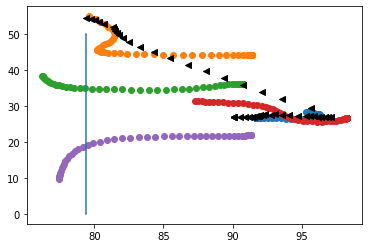

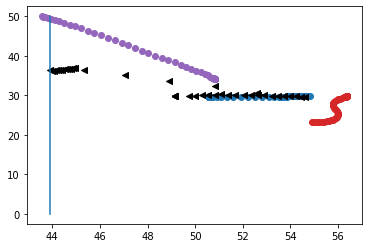

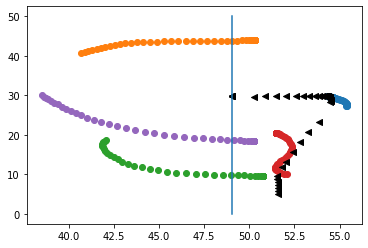

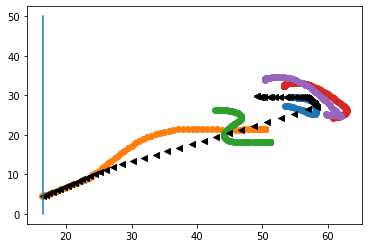

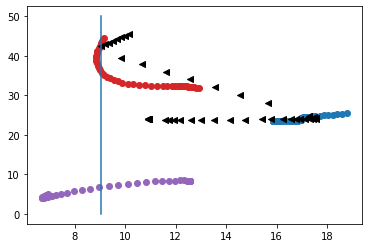

In [30]:
game_test = list(week1[week1.gameId == 2018090600].sort_values(by=['time'])['playId'].unique())
for j in game_test[:5]:
    catch = week1[(week1.playId == j) & (week1.gameId == 2018090600)]
    routes = catch[['x','y','displayName']]
    for i in names:
        if i=='Football':
            run = routes[routes.displayName == i]
            x = run.x
            y = run.y
            plt.scatter(list(x), list(y), c='black',marker='<')
            plt.plot([min(x), min(x)], [0, 50])

        elif i in list(checking.displayName):
            run = routes[routes.displayName == i]
            x = run.x
            y = run.y
            plt.scatter(list(x), list(y))


    plt.show()

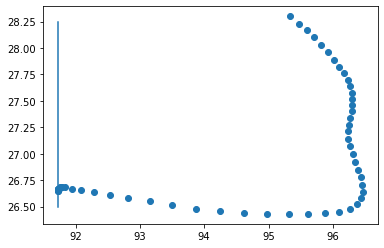

In [31]:
plt.scatter(list(mryan.x), list(mryan.y))
plt.plot([min(mx), min(mx)], [26.50, 28.25],)

In [32]:
testing.sort_values(by=['offensePlayResult'], ascending=False)

,gameId,playId,playDescription,passResult,playResult,offensePlayResult
12752,2018112509,2475,(10:47) B.Roethlisberger pass deep middle to J...,C,97,97
12011,2018112201,2897,(2:27) (Shotgun) D.Prescott pass deep middle t...,C,90,90
17665,2018123004,2619,(8:51) (Shotgun) P.Mahomes pass deep middle to...,C,89,89
14848,2018120910,1384,(10:00) (Shotgun) N.Mullens pass short right t...,C,85,85
16497,2018122310,3026,(2:32) (Shotgun) N.Foles pass deep middle to N...,C,83,83
...,...,...,...,...,...,...
13473,2018120202,3751,(8:26) M.Stafford sacked at DET 29 for -13 yar...,S,-18,-18
5599,2018100710,3875,(4:41) (Shotgun) C.Beathard sacked at SF 33 fo...,S,-41,-18
15621,2018121603,4458,(:24) (Shotgun) A.Rodgers sacked at CHI 27 for...,S,-18,-18
3026,2018092307,2712,(6:26) J.Allen sacked at BUF 42 for -13 yards ...,S,-19,-19
